In [54]:
# set up
import os
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

os.chdir("../data/")

In [6]:
# load data
parcels = geopandas.read_file('Parcels_FY19')

In [11]:
parcels.head()

,OBJECTID,Map,Block,Lot,MBL,PolyType,AddNum,Street,AddNum2,Street2,AddNum3,Street3,SublotOf,TaxParMBL,Shape_Leng,Shape_Area,geometry
0,1,19,F,1,19-F-1,PARCEL,838,BROADWAY,None,None,None,None,None,19-F-1,2133.460536,197502.465873,"(POLYGON ((759940.058133468 2971010.939469054,..."
1,2,54,D,5,54-D-5,PARCEL,393,WASHINGTON ST,None,None,None,None,None,54-D-5,316.130596,2397.402540,(POLYGON ((762784.5485074669 2963229.330360398...
2,3,85,A,14,85-A-14,PARCEL,0,ASSEMBLY ROW,None,None,None,None,None,85-A-14,9542.340855,207970.565472,"POLYGON ((769452.9154200554 2969581.503351554,..."
3,4,94,C,6,94-C-6,PARCEL,10,POPLAR ST,None,None,None,None,None,94-C-6,1492.376498,83911.819744,"POLYGON ((767606.6182596385 2962997.970258817,..."
4,5,117,A,2,117-A-2,PARCEL,0,INNER BELT RD,None,None,None,None,None,117-A-2,4249.883150,239816.278490,(POLYGON ((771386.5998728871 2961124.379845887...


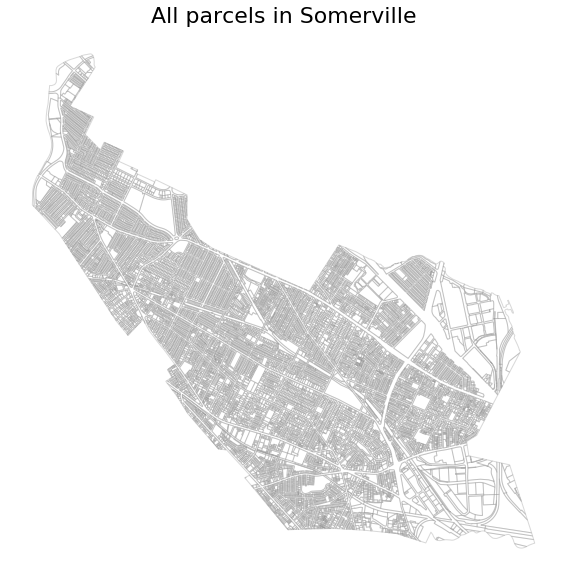

In [7]:
# parcel map
fig, ax = plt.subplots(figsize=(20,10))
parcels.plot(ax=ax, color='white', edgecolor='grey', alpha=0.3)
plt.title("All parcels in Somerville", fontsize=22)
plt.axis('off');

In [18]:
# read in labels
manual_labels = pd.read_csv('../labels/training_labels_updated_111219.csv')
additional_manual_labels = pd.read_csv('../labels/additional_training_labels_120319.csv')
labels = pd.concat([manual_labels, additional_manual_labels])

/Users/anthonyrentsch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [21]:
manual_labels.shape, additional_manual_labels.shape, labels.shape

((488, 9), (162, 9), (650, 12))

In [22]:
labels.head()

,ADDRESS_FOR_STREET_VIEW,ADDR_NUM,AERIAL_Driveway,FULL_STR,GSV_Driveway,MBL,aerial_addr,aerial_filename,final_label,gsv_filename,sv_addr,three_class_label
0,"5 DOUGLAS AVE, SOMERVILLE, MA",5,2.0,DOUGLAS AVE,0.0,47-G-17,NaN,5_DOUGLAS_AVE_aerial.png,0.1,5_DOUGLAS_AVE.jpg,NaN,NaN
1,"6 HILLSIDE CIR, SOMERVILLE, MA",6,1.0,HILLSIDE CIR,2.0,38-A-47,NaN,6_HILLSIDE_CIR_aerial.png,0.9,6_HILLSIDE_CIR.jpg,NaN,NaN
2,"8 BELMONT PL, SOMERVILLE, MA",8,2.0,BELMONT PL,2.0,44-A-48,NaN,8_BELMONT_PL_aerial.png,0.5,8_BELMONT_PL.jpg,NaN,NaN
3,"8 DRESDEN CIR, SOMERVILLE, MA",8,2.0,DRESDEN CIR,2.0,25-A-13,NaN,8_DRESDEN_CIR_aerial.png,0.5,8_DRESDEN_CIR.jpg,NaN,NaN
4,"8 HAWTHORNE ST, SOMERVILLE, MA",8,0.0,HAWTHORNE ST,2.0,25-D-16,NaN,8_HAWTHORNE_ST_aerial.png,0.1,8_HAWTHORNE_ST.jpg,NaN,NaN


In [49]:
labels.final_label.value_counts()

1.0    294
0.9    211
0.1     60
0.0     43
0.5     42
Name: final_label, dtype: int64

In [26]:
# join
parcel_labels = parcels.merge(labels, how='left', left_on='TaxParMBL', right_on='MBL')

In [27]:
parcel_labels.shape

(14096, 29)

In [83]:
# denote ones we have labeled
parcel_labels['label_flag'] = pd.notna(parcel_labels['final_label'])

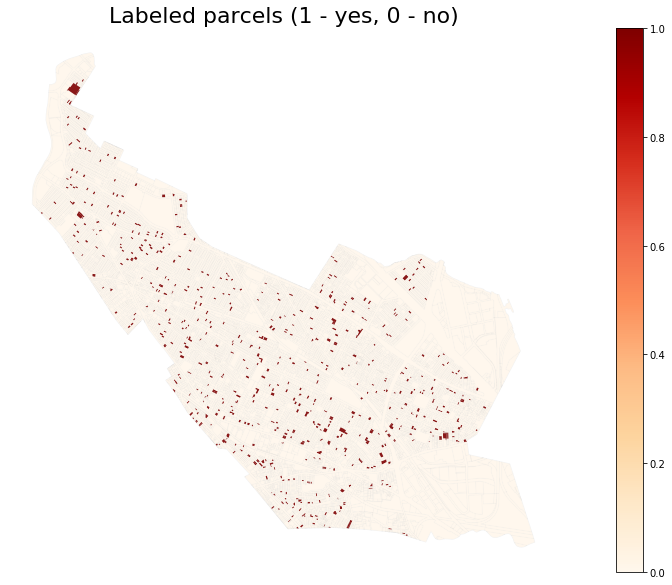

In [84]:
# map where we labeled
fig, ax = plt.subplots(figsize=(20,10))
parcel_labels.plot(ax=ax, color='white', edgecolor='grey', alpha=0.1)
parcel_labels.plot(ax=ax, column='label_flag', alpha=0.9, legend=True, cmap='OrRd')
plt.title("Labeled parcels (1 - yes, 0 - no)", fontsize=22)
plt.axis('off');

In [85]:
# map what labels were
label_mapping = {0: 'no', 0.1:'no', 0.5:'unsure', 0.9:'yes', 1:'yes', np.nan:'no label'}
parcel_labels['3_labels'] = parcel_labels['final_label'].map(label_mapping)

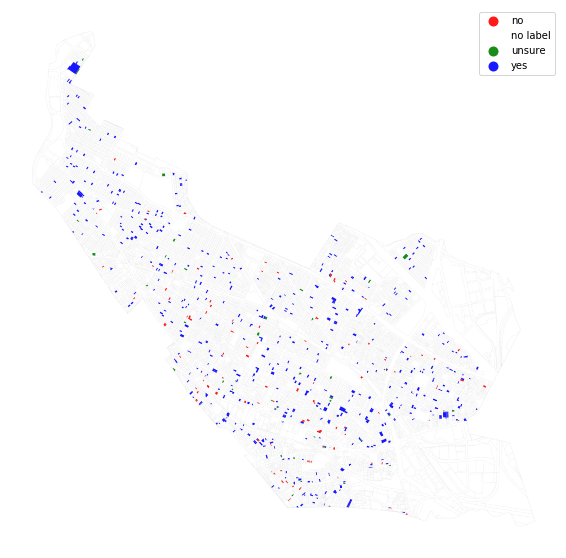

In [87]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(["red", "white", "green", "blue"])
fig, ax = plt.subplots(figsize=(20,10))
parcel_labels.plot(ax=ax, color='white', edgecolor='grey', alpha=0.1)
parcel_labels.plot(ax=ax, column='3_labels', alpha=0.9, legend=True, cmap=cmap)
plt.title("", fontsize=22)
plt.axis('off');